# Corizo Internship- Miner Project
Stock Price Prediction Using Python

Submitted By
Nilesh Baraskar

In [23]:
pip install chart-studio

In [24]:
pip install plotly

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [4]:
#Import file
df = pd.read_csv('C:/Users/cws/OneDrive/Desktop/1729258-1613615-Stock_Price_data_set.csv')

#top 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')


Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460 days


In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<Axes: >

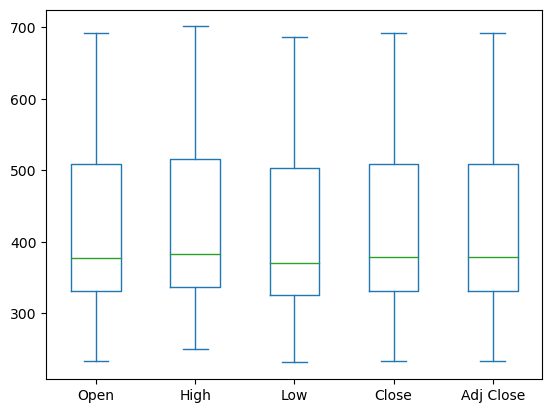

In [9]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [10]:
#Setting the layout for our plot
layout = go.Layout(
       title='Stock Prices',
       xaxis=dict(
           title='Date',
           titlefont=dict(
                 family='Courier New, monospace',
                 size=18,
                 color='#7f7f7f'
           )
       ),
       yaxis=dict(
           title='Price',
           titlefont=dict(
                 family='Courier New, monospace',
                 size=18,
                 color='#7f7f7f'
           )
       )
)

df_data = [{'x' : df['Date'], 'y' : df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

In [11]:
#plot(plot) #Plotting offline
iplot(plot)

In [12]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [13]:
#Split the data into train and test sets
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Creating a linear Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [17]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
     x = X_train.T[0],
     y = Y_train,
    mode = 'markers',
    name = 'actual'
)
trace1 = go.Scatter(
     x = X_train.T[0],
     y = lm.predict(X_train).T,
     mode = 'lines',
     name = 'Predicted'
)
df_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=df_data, layout=layout)

In [18]:
iplot(plot2)

In [73]:
#Calculate Scores for Model Evaluation
scores = f'''
{'Metrics'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metrics          Train                Test        
r2_score  0.6992669032944175	0.7261648669848495
MSE       3403.003880002517	3460.9885809580633



Thank you